In [22]:
import pandas as pd
from pandas import DataFrame
import os
import calendar
from pretty_html_table import build_table
import sys
import json
from pandas import json_normalize

#
# Read in file with user request for monthly data
#

colNames = ['Rainfall', 'High', 'Low', 'Year', 'Month', 'Day']
#df = pd.read_json('/var/www/html/000/monthly.txt')
df = pd.read_json('/Users/jameshayes/monthly.txt')
df = df.drop(df.columns[[0]], axis=1)
print(df)

html_table_blue_light = build_table(df, 'blue_light')

#with open('/var/www/html/000/monthlyTable.html', 'w') as f:
with open('/Users/jameshayes/monthlyTable.html', 'w') as f: 
    f.write(html_table_blue_light)

#
# Get month name from the month number and year
#

xd = (df.loc[df['Month']].values[0])
sd = (df.loc[df['Month']].values[0])
print(sd)

month_num = int(xd[4])
month_name = calendar.month_name[month_num]
year = int(sd[3])
print(month_num, month_name, year)

    Rain  HiTemp  LowTemp  Year  Month  Day
0   1.26      85       70  2021      9    1
1   0.26      78       62  2021      9    2
2   0.00      76       56  2021      9    3
3   0.00      78       58  2021      9    4
4   0.10      79       64  2021      9    5
5   0.20      85       67  2021      9    6
6   0.00      80       60  2021      9    7
7   0.01      84       68  2021      9    8
8   0.98      76       67  2021      9    9
9   0.00      76       60  2021      9   10
10  0.00      81       54  2021      9   11
11  0.00      86       65  2021      9   12
12  0.00      88       71  2021      9   13
13  0.00      80       65  2021      9   14
14  0.00      87       70  2021      9   15
15  0.09      76       71  2021      9   16
16  0.00      72       71  2021      9   17
17  0.00      84       66  2021      9   18
18  0.00      79       61  2021      9   19
19  0.00      78       57  2021      9   20
20  0.00      81       64  2021      9   21
21  0.00      83       71  2021 

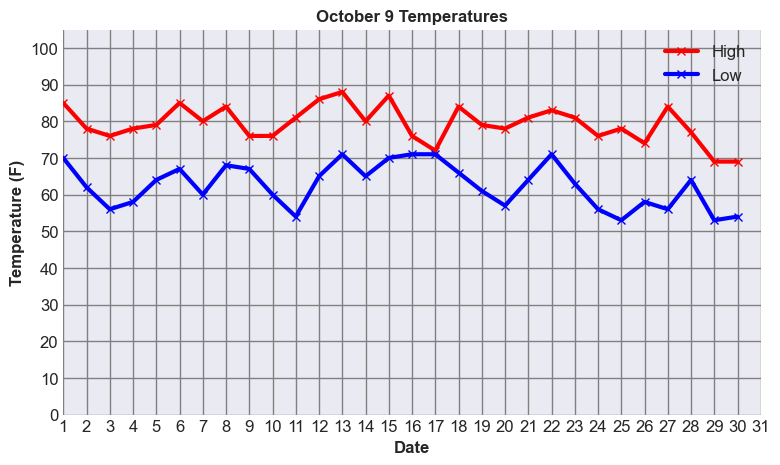

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

df['Day'] = df['Day'].astype(int)
df['High'] = df['HiTemp'].astype(int)
df['Low'] = df['LowTemp'].astype(int)
    
HI = df['High']
LO = df['Low']
DAY = df['Day']

y = HI.to_numpy()
y1 = LO.to_numpy()
x = DAY.to_numpy()
            
plt.style.use('seaborn-v0_8-dark')
    
path1 = '/Users/jameshayes/'
#path1 = '/var/www/html/000/'
plt.figure(figsize= (9,5))
plt.locator_params(axis = 'x', nbins = 31)
plt.xlim(1,31)
plt.ylim(0, 105)
plt.xticks(fontsize=12)
plt.xlabel('Date', fontsize=12, fontweight ='bold')
plt.yticks(fontsize=12)
plt.ylabel('Temperature (F)', fontsize=12, fontweight ='bold')
plt.locator_params(axis='y', nbins=20)
plt.title(f'{month_name} {year} Temperatures', fontsize=12, fontweight ='bold')
plt.grid(axis = "y", linewidth = 1.0, color = 'gray')
plt.grid(axis = "x", linewidth = 1.0, color = 'gray')   
plt.plot(x, y, marker = "x", color = "red", linewidth =3, label ="High")
plt.plot(x, y1, marker = "x", color = "blue", linewidth =3, label ="Low")
plt.legend(fontsize = 12)
plt.savefig(f'{path1}monthlyTemps_db')
#plt.show()

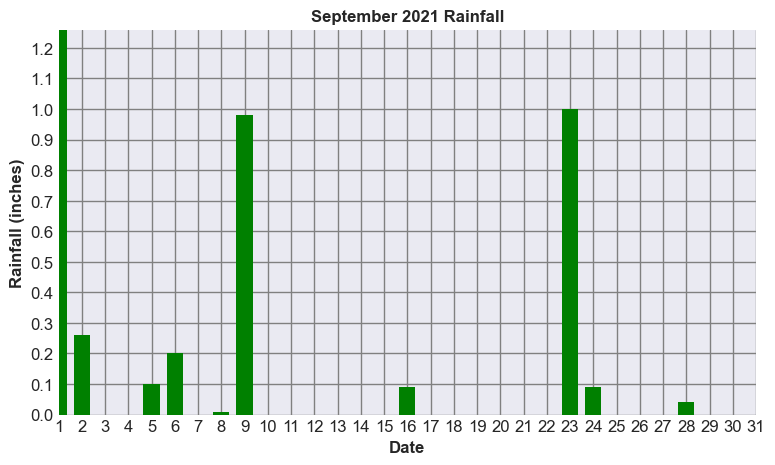

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import datetime

path1 = '/Users/jameshayes/'
#path1 = '/var/www/html/000/'

df['Day'] = df['Day'].astype(int)
df['Rainfall'] = df['Rain'].astype(float)
    
RAINFALL = df['Rainfall']
DAY = df['Day']

y = RAINFALL.to_numpy()
x = DAY.to_numpy()

plt.style.use('seaborn-v0_8-dark')
    
plt.figure(figsize= (9,5))
plt.locator_params(axis = 'x', nbins = 31)
plt.xlim(1, 31)
plt.xticks(fontsize=12)
plt.xlabel('Date', fontsize=12, fontweight ='bold')
plt.yticks(fontsize=12)
plt.ylabel('Rainfall (inches)', fontsize=12, fontweight ='bold')
plt.locator_params(axis='y', nbins=20)
plt.title(f'{month_name} {year} Rainfall', fontsize=12, fontweight ='bold')
plt.grid(axis = "y", linewidth = 1.0, color = 'gray')
plt.grid(axis = "x", linewidth = 1.0, color = 'gray')


plt.bar(df['Day'], df['Rain'], color ='green', width = 0.7)
plt.autoscale(enable = True, axis = 'y', tight = True)
#plt.legend(fontsize = 12)
plt.savefig(f'{path1}monthlyRain_db')
#plt.show()